In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('usd_exchange_rates.csv')
df['date'] = pd.to_datetime(df['TIME_PERIOD'])
df['value'] = df['OBS_VALUE'].astype(float)
df = df.sort_values('date').reset_index(drop=True)

In [3]:
# Create lag features
for lag in range(1, 6):  # You can tune the number of lags
    df[f'lag_{lag}'] = df['value'].shift(lag)

# Drop rows with NaN values due to lagging
df = df.dropna().reset_index(drop=True)

In [4]:
# Determine the split index
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

# Features and target
features = [f'lag_{lag}' for lag in range(1, 6)]
X_train, y_train = train[features], train['value']
X_test, y_test = test[features], test['value']

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Predict on test set
test['prediction'] = model.predict(X_test)

C:\Users\alius\AppData\Local\Temp\ipykernel_19184\93237969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(X_test)


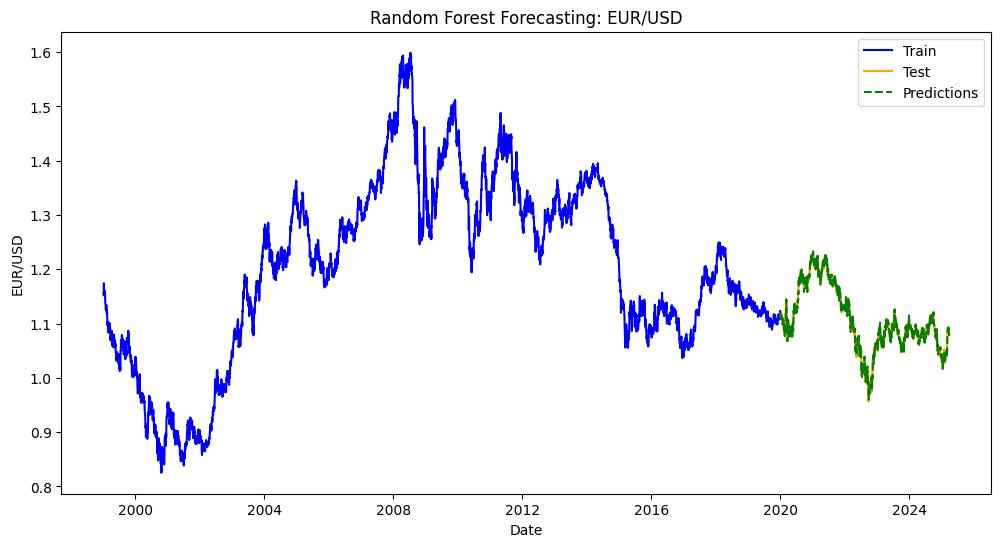

In [9]:
plt.figure(figsize=(12,6))
plt.plot(train['date'], train['value'], label='Train', color='blue')
plt.plot(test['date'], test['value'], label='Test', color='orange')
plt.plot(test['date'], test['prediction'], label='Predictions', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('EUR/USD')
plt.title('Random Forest Forecasting: EUR/USD')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE
mse = mean_squared_error(y_test, test['prediction'])

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_test, test['prediction'])

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - test['prediction']) / y_test)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0058
Mean Absolute Error (MAE): 0.0044
Mean Absolute Percentage Error (MAPE): 0.40%


In [11]:
# Save Random Forest predictions + actuals to CSV
output_df = pd.DataFrame({
    'date':       test['date'],
    'actual':     test['value'],
    'prediction': test['prediction']
})

output_df.to_csv('random_forest_predictions.csv', index=False)
print("Forecast data saved to 'random_forest_predictions.csv'")


Forecast data saved to 'random_forest_predictions.csv'
